In [1]:
#importing required packages
import pandas as pd
#read data file
df=pd.read_csv("C:\datasets\salaries.csv")
df.head()



,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
inputs=df.drop('salary_more_then_100k',axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [4]:
target=df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [5]:
#processing dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [7]:
inputs['company_n']=le.fit_transform(inputs['company'])
inputs['job_n']=le.fit_transform(inputs['job'])
inputs['degree_n']=le.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [8]:
input_n=inputs[['company_n','job_n','degree_n']]
input_n


,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(input_n,target)


DecisionTreeClassifier()

In [11]:
model.score(input_n,model.predict(input_n))

1.0

In [12]:
model.predict([[2,2,1]])

array([0], dtype=int64)

<Figure size 14400x14400 with 0 Axes>

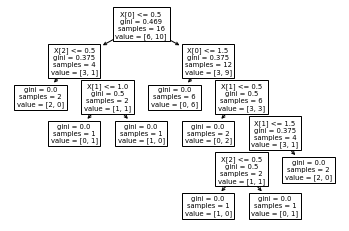

<Figure size 14400x14400 with 0 Axes>

In [26]:
#install !conda install -c conda-forge pydotplus -y
#install !conda install -c conda-forge python-graphviz -y
#from sklearn.externals.six import StringIO
#import pydotplus
#import matplotlib.image as mpimg
#from sklearn import tree
#%matplotlib inline
from matplotlib import pyplot as plt
tree.plot_tree(model)
plt.figure(figsize=(200,200))